### HW 8 - Clustering
#### Shifa Shah
#### ss08336@st.habib.edu.pk

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
ice_cream_df = pd.read_csv('baskin_robbins_icecream.csv')
ice_cream_df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category
0,Bananas Foster,160,8.0,0.2,20,16,2.0,std
1,Baseball Nut,160,9.0,0.2,19,13,3.0,std
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,std
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,std
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,light


### Q1

In [4]:
X = ice_cream_df.drop(columns = ['Category', 'Flavour'],axis=1)

In [5]:
X.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,160,8.0,0.2,20,16,2.0
1,160,9.0,0.2,19,13,3.0
2,170,9.0,0.3,21,15,3.0
3,120,4.0,0.1,17,16,3.0
4,130,2.0,0.1,26,20,2.0


### Q2

In [7]:
scaler = MinMaxScaler()
XS = scaler.fit_transform(X)
XS[1:5]

array([[0.34615385, 0.15      , 0.4       , 0.24      , 0.375     ,
        0.375     ],
       [0.38461538, 0.15      , 0.6       , 0.32      , 0.45833333,
        0.375     ],
       [0.19230769, 0.06666667, 0.2       , 0.16      , 0.5       ,
        0.375     ],
       [0.23076923, 0.03333333, 0.2       , 0.52      , 0.66666667,
        0.25      ]])

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
wss = []


for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init=10, random_state = 99)
    kmeans.fit(XS)
    wss.append(kmeans.inertia_)

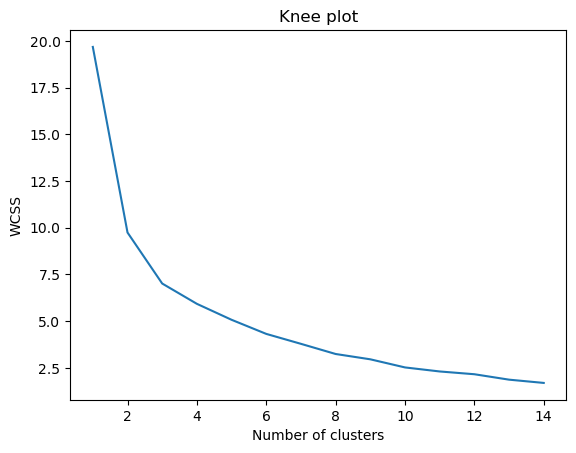

In [10]:
plt.plot(range(1, 15), wss)
plt.title('Knee plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Q4

In [12]:
kmeans = KMeans(n_clusters = 2, max_iter = 300, random_state = 99)
Y = kmeans.fit_predict(XS)

In [13]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0])

In [14]:
score = silhouette_score(XS, kmeans.labels_, metric='euclidean')
score

0.45141141845881283

#### Q5

Text(0.5, 1.0, 'The dataset post clustering')

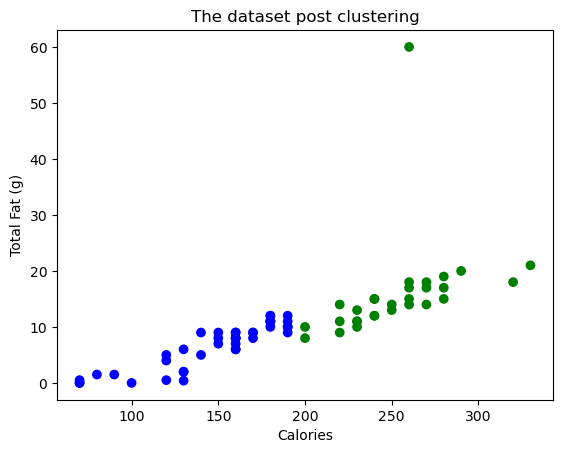

In [52]:
color=np.array(['green','blue'])
plt.scatter(x=X.Calories, y=X['Total Fat (g)'], c=color[kmeans.labels_])
plt.xlabel('Calories')
plt.ylabel('Total Fat (g)')
plt.title("The dataset post clustering")

#### Q6

In [65]:
C1 = X.iloc[Y == 0, :]
C2 = X.iloc[Y == 1, :]

In [69]:
C1.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
8,200,8.0,0.2,38,7,5.0
9,220,11.0,0.4,26,19,4.0
11,230,13.0,0.4,25,18,5.0
12,240,15.0,0.5,23,18,5.0
13,280,15.0,0.5,31,23,5.0


In [71]:
C2.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,160,8.0,0.2,20,16,2.0
1,160,9.0,0.2,19,13,3.0
2,170,9.0,0.3,21,15,3.0
3,120,4.0,0.1,17,16,3.0
4,130,2.0,0.1,26,20,2.0


In [96]:
C1.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,252.758621,15.896552,0.400000,27.275862,19.965517,4.965517
std,30.925781,9.123536,0.070711,4.463315,4.153164,1.017095
min,200.000000,8.000000,0.200000,20.000000,7.000000,4.000000
25%,230.000000,12.000000,0.400000,24.000000,18.000000,4.000000
50%,250.000000,14.000000,0.400000,28.000000,20.000000,5.000000
75%,270.000000,17.000000,0.400000,30.000000,23.000000,5.000000
max,330.000000,60.000000,0.500000,38.000000,28.000000,8.000000


In [74]:
C1['Total Fat (g)'].mean()

15.89655172413793

<Axes: >

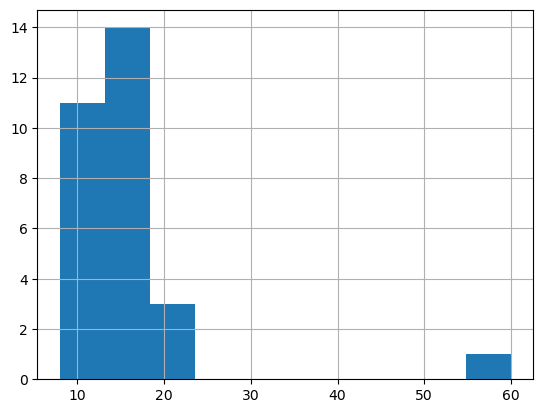

In [76]:
C1['Total Fat (g)'].hist()

<Axes: xlabel='Total Fat (g)', ylabel='Count'>

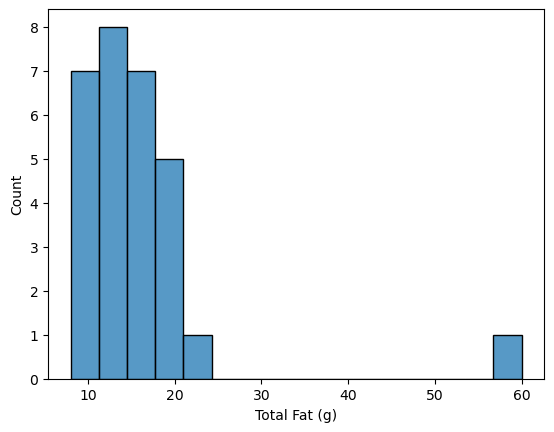

In [78]:
sns.histplot(data=C1, x="Total Fat (g)")

In [98]:
C2.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,148.536585,6.790244,0.190244,19.804878,14.756098,2.578049
std,35.676391,3.933053,0.120010,3.689306,3.359914,1.311204
min,70.000000,0.000000,0.000000,13.000000,4.000000,0.000000
25%,130.000000,4.000000,0.100000,17.000000,13.000000,2.000000
50%,160.000000,8.000000,0.200000,20.000000,15.000000,3.000000
75%,180.000000,10.000000,0.300000,21.000000,17.000000,3.000000
max,190.000000,12.000000,0.400000,30.000000,20.000000,6.000000


In [80]:
C2['Total Fat (g)'].mean()

6.790243902439024

<Axes: >

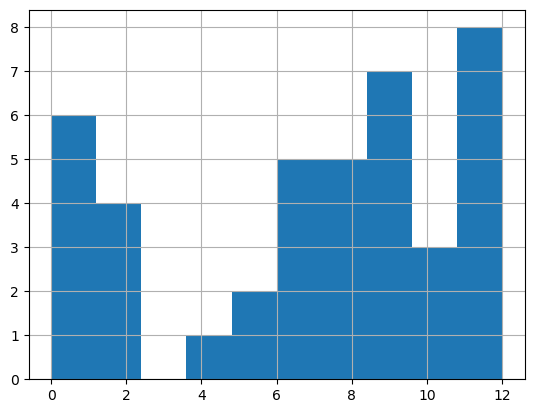

In [82]:
C2['Total Fat (g)'].hist()

<Axes: xlabel='Total Fat (g)', ylabel='Count'>

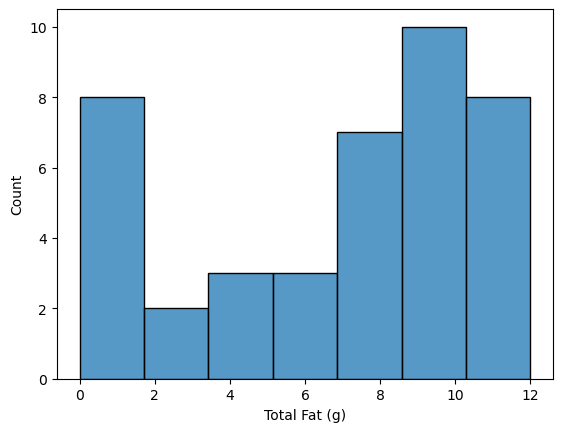

In [84]:
sns.histplot(data=C2, x="Total Fat (g)")

#### C1 insights:<br>
##### The shows a variety of options, with calories ranging from 200 to 330 and a median of 250. Total fat content, averages around 15.9g, with most ice creams keeping trans fat levels low at 0.4g or less. Carbohydrate and sugar contents have median values of 28g and 20g, respectively, indicating a balanced sweetness, while protein levels are relatively consistent at around 5g. Overall, the products cater to mainstream consumers by offering a moderate balance between indulgence and health.
#### C2 insights:<br>
##### This dataset likely represents low-calorie ice creams, with calorie counts ranging from 70 to 190. Fat content is low with a mean of 6.8g, with minimal trans fats. Carbohydrates and sugars are moderate, providing controlled sweetness. Overall, these ice creams are consistent, low-fat, and lighter optionss.

#### Q8

#### C1 has high Fat content, around 15.9g so we can call it Fat not fit. <br>C2 has comparatively low fat content, around 6.8 g, so it can be named as Skinny swirl.